# Task DL. The Colruyt Deep Learning Challenge

- Student name: Yori Verbist
- Number: R0697651

Last year, you probably heard about a pilot project of Colruyt, one of the largest supermarket chains in Belgium. Since August 2019, Colruyt has been using Deep Learning in two of its supermarkets to recognize fruit and vegetables and weight them automatically. Now it's up to you to build and train such an image recognition system yourself.

*__We are also going to do a small competition.__ Try to achieve an accuracy as high as possible. During the last lesson, we will give you 20 images of fruits. The student who can classify the most images correctly wins the competition. In case of an ex aequo, the student with the highest accuracy wins. Eternal fame will be his part.*

You can read and watch the news item on vrt via the link below (in Dutch).

<a href="https://www.vrt.be/vrtnws/nl/2019/08/08/productherkenning-in-de-colruyt/">vrt NWS</a>

Colruyt made a little video which you can watch below.

In [1]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/RPjt1-ZtTLg?start=0&end=330" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 1. The dataset

First you need a large amount of train and test images of fruits. I've downloaded about 500 images of 10 different fruits from https://www.flickr.com/. You can find them in this rar-file:

<a href="http://taiwan.thomasmore.be/pr2/koen/colruyt_orig.rar">Colruyt</a>

Start by unpacking the training/validation dataset. First have a look at the different folders and images.

## 2. Binary classification

Next, build and train a classifier (like we did with the cats and dogs example). At first make the classification task a little bit simpler with only two fruits (binary = two-class). This will result in lower complexity and hopefully faster training on your laptop.

```What two fruits did you select?```
apples and peaches because they look alike

```Insert a screenshot of the training process and the final accuracy achieved.```

In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
# Insert the code for building and training your classifier.
path1 = Path("binary")

fruits1 = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())


dls = fruits1.dataloaders(path1)
#dls.valid.show_batch(max_n=16, nrows=4)

learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
learn1.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.913048,0.444957,0.878049,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.331471,0.162847,0.945122,00:04
1,0.266402,0.154355,0.951219,00:04
2,0.205101,0.131263,0.951219,00:04
3,0.159394,0.106641,0.957317,00:05
4,0.130351,0.104579,0.963415,00:05


In [3]:
learn1.recorder.values[-1][-1]

0.9634146094322205

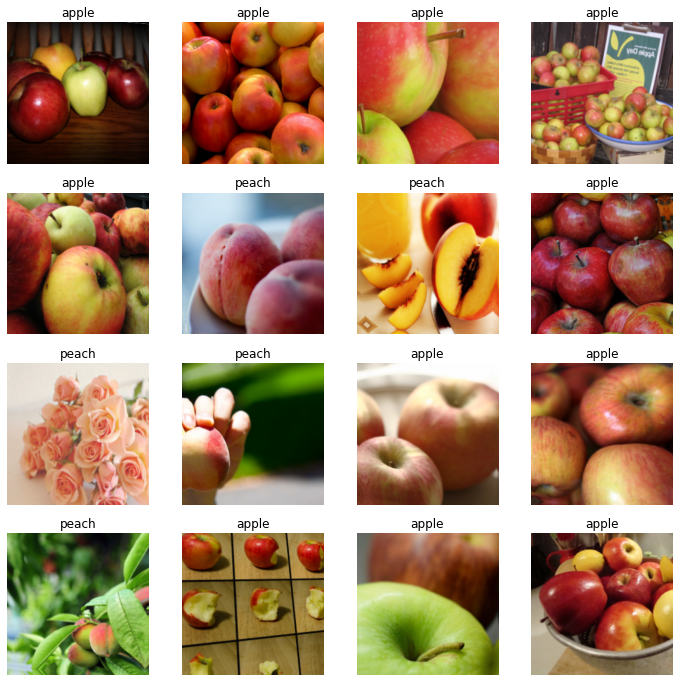

In [4]:
dls.train.show_batch(max_n=16, nrows=4)

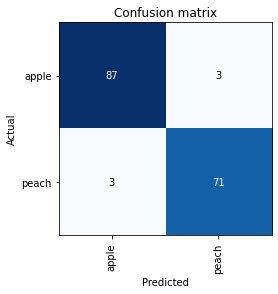

In [5]:
interp1 = ClassificationInterpretation.from_learner(learn1)
interp1.plot_confusion_matrix()

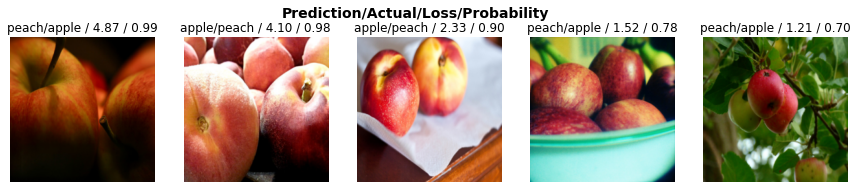

In [6]:
interp1.plot_top_losses(5, nrows=1)

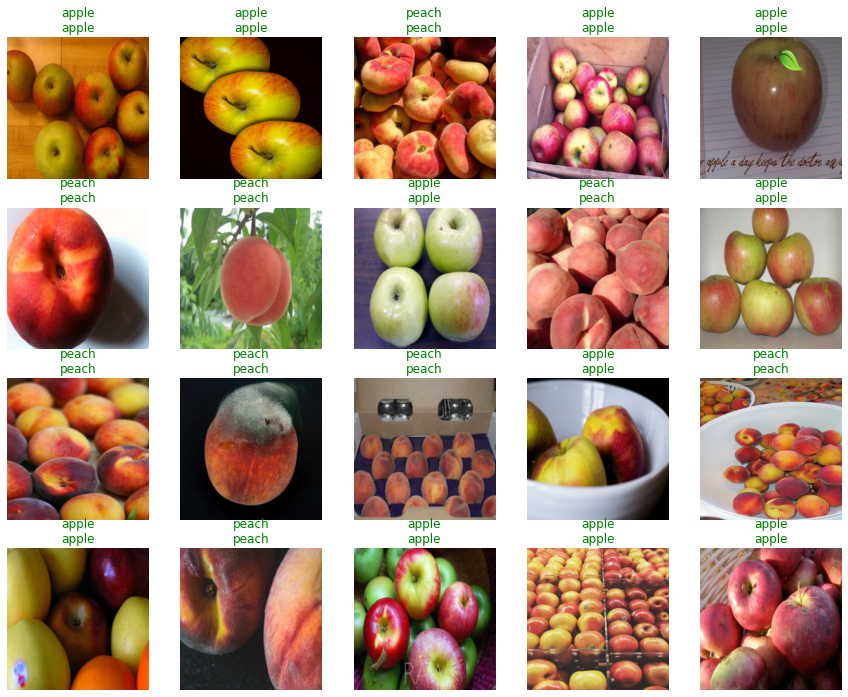

In [7]:
learn1.show_results(max_n=20)

Download at least ten images of the two fruits (five of each) you selected and see if your model can classify them correctly.

## 3. Classification with all fruits

Now we make things a little more complicated and challenging. Repeat the proces from above with all the (10) classes. It might take some time now to train the model! You also need to change your program because there are 10 classes now.

Once you're finished, try to achieve an accuracy as high as possible. This is not an exact science. So you will have to experiment with the parameters of your CNN. Possible things to consider:

- the input shape of the images
- the number of filters
- the use of layers to prevent overfitting
- the number of layers
- the number of epochs
- the number of steps per epoch
- ...

__It might be a good idea to have a look at some existing famous CNN Architectures for Image Classification (VGGNet, ...), built by researchers around the world. So search the Internet and find some good examples of CNN's and look for some best practices.__

This website can be a good start:
<a href="https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b">Five Powerful CNN Architectures</a>

```Write a small report (10 lines) about the things you've tried to optimize your classifier and which configuration gave the best results. Where did you find the information?```

```Insert a screenshot of the training process and the final accuracy achieved.```

In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
# Insert the code for building and training your classifier.
path = Path("all")

fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = fruits.dataloaders(path)
#dls.valid.show_batch(max_n=16, nrows=4)

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,1.263882,0.273037,0.918536,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.298366,0.228232,0.937426,00:16
1,0.210692,0.209199,0.942149,00:16
2,0.163710,0.174216,0.949233,00:16
3,0.130929,0.296325,0.942149,00:16
4,0.127183,0.243808,0.940968,00:16
5,0.102913,0.197948,0.949233,00:16
6,0.090080,0.240786,0.953955,00:16
7,0.069270,0.190668,0.961039,00:16
8,0.051742,0.234328,0.957497,00:16
9,0.045364,0.197560,0.963400,00:16


In [9]:
learn.recorder.values

[(#2) [None,None]]

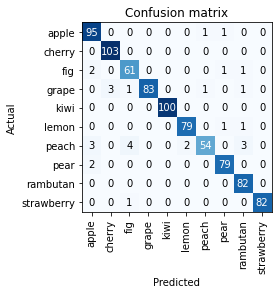

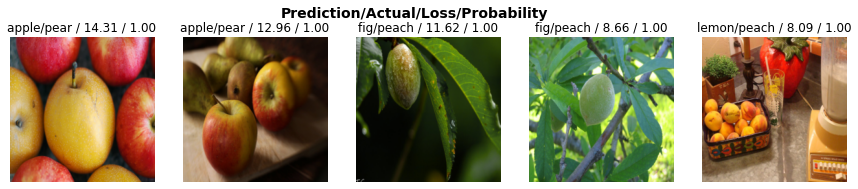

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

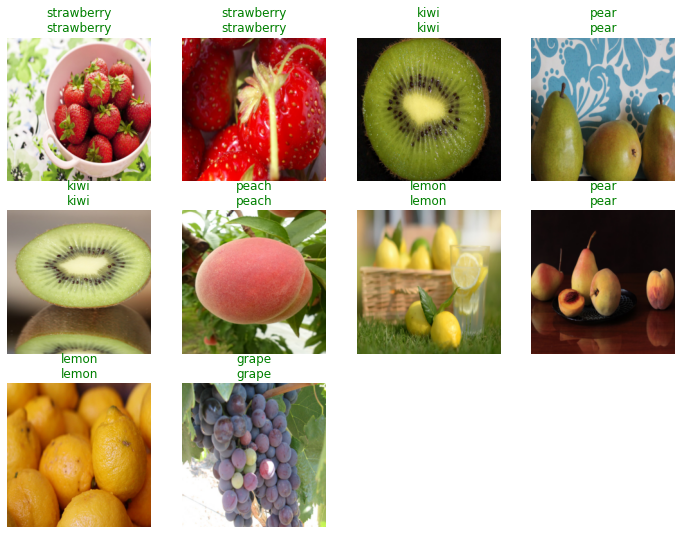

In [5]:
learn.show_results(max_n=10)

## 4. Classify the sample images

Now that your classifier is ready, have a look at the images in the `single_images` folder. Write a Python program that automatically retrieves a list of all the images in this folder and classifies these images. Print a list with in the first column the name of the image file and in the second column the recognized fruit. Check how many fruits were classified correctly. Are you ready to compete in our Colruyt Deep Learning Challenge?

In [6]:
# Insert a list of images and classification
# Correct x/20 ?
for i in range(20):
    name = "colruyt_orig/single_images/img" + f'{i + 1:02}' + ".jpg"
    x = name.find("img")
    predict = learn.predict(name)
    print(name[x:] +  "\t\t", predict[0]+ "\t certainty:", predict[2][predict[1]])


img01.jpg		 apple	 certainty: tensor(1.0000)


img02.jpg		 cherry	 certainty: tensor(1.0000)


img03.jpg		 apple	 certainty: tensor(0.9991)


img04.jpg		 cherry	 certainty: tensor(1.)


img05.jpg		 kiwi	 certainty: tensor(1.)


img06.jpg		 peach	 certainty: tensor(1.0000)


img07.jpg		 fig	 certainty: tensor(0.9988)


img08.jpg		 rambutan	 certainty: tensor(1.0000)


img09.jpg		 grape	 certainty: tensor(1.0000)


img10.jpg		 lemon	 certainty: tensor(1.0000)


img11.jpg		 grape	 certainty: tensor(1.0000)


img12.jpg		 strawberry	 certainty: tensor(1.0000)


img13.jpg		 lemon	 certainty: tensor(1.0000)


img14.jpg		 strawberry	 certainty: tensor(1.)


img15.jpg		 kiwi	 certainty: tensor(1.)


img16.jpg		 pear	 certainty: tensor(1.0000)


img17.jpg		 pear	 certainty: tensor(1.0000)


img18.jpg		 peach	 certainty: tensor(1.0000)


img19.jpg		 fig	 certainty: tensor(1.0000)


img20.jpg		 rambutan	 certainty: tensor(1.)


Print your Jupyter Notebook to pdf and upload it via Canvas.